https://www.princeton.edu/~otorres/Panel101R.pdf

https://dss.princeton.edu/training/Panel101.pdf

https://www.sas.upenn.edu/~fdiebold/Teaching104/Econometrics.pdf

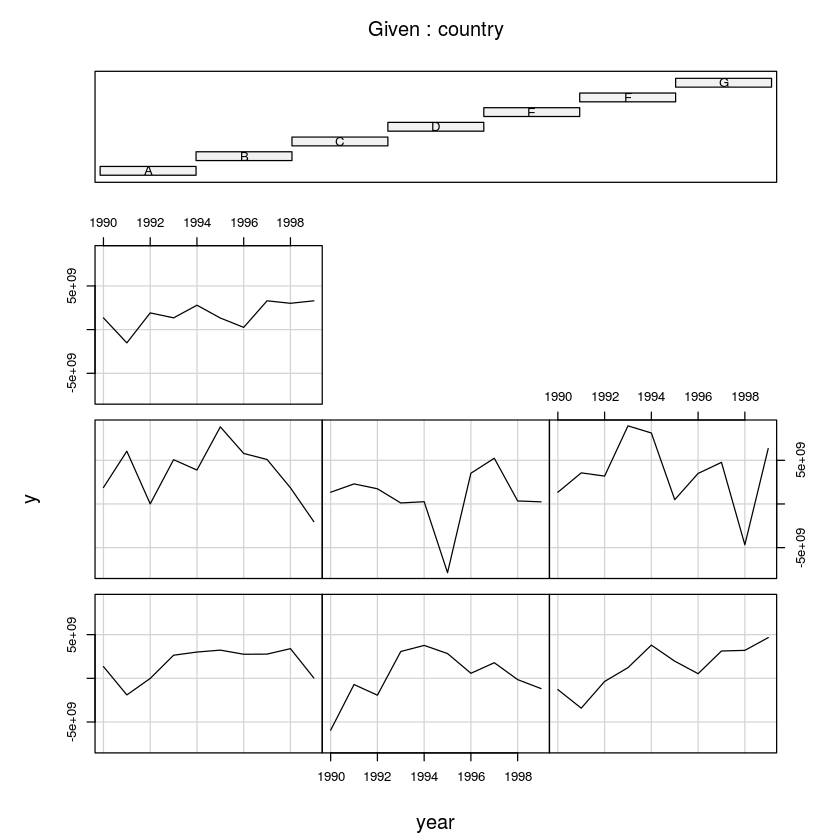

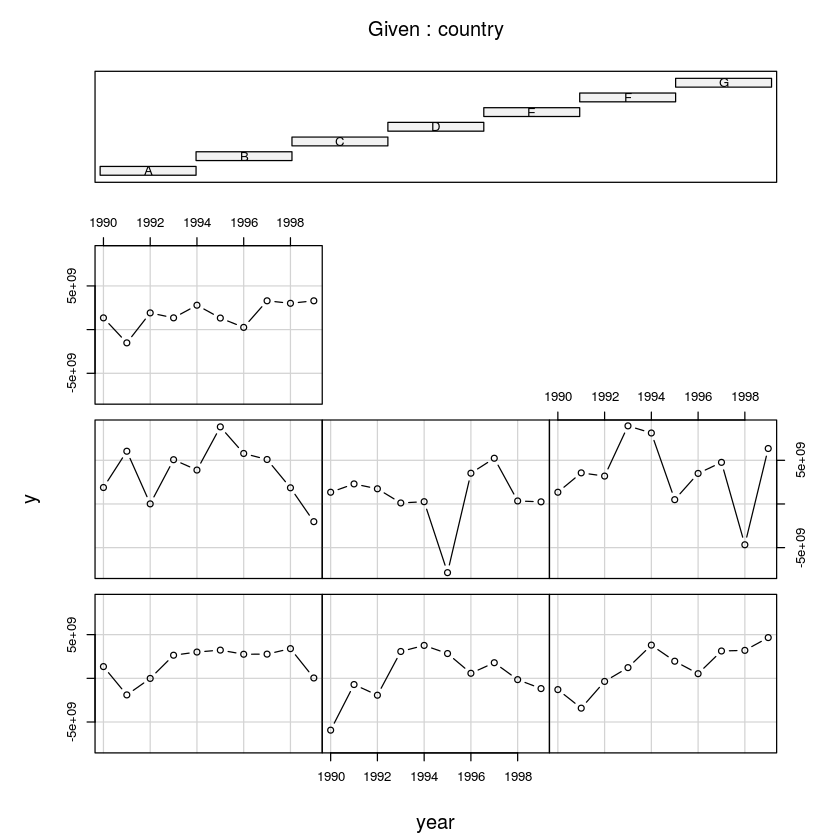

In [3]:
# Exploring panel data

library(foreign)
Panel <- read.dta("http://dss.princeton.edu/training/Panel101.dta")



In [7]:
head(Panel)

country,year,y,y_bin,x1,x2,x3,opinion
A,1990,1342787840,1,0.2779036,-1.1079559,0.28255358,Str agree
A,1991,-1899660544,0,0.3206847,-0.9487200,0.49253848,Disag
A,1992,-11234363,0,0.3634657,-0.7894840,0.70252335,Disag
A,1993,2645775360,1,0.2461440,-0.8855330,-0.09439092,Disag
A,1994,3008334848,1,0.4246230,-0.7297683,0.94613063,Disag
A,1995,3229574144,1,0.4772141,-0.7232460,1.02968037,Str agree


In [5]:
summary(Panel)

 country      year            y                  y_bin           x1         
 A:10    Min.   :1990   Min.   :-7.863e+09   Min.   :0.0   Min.   :-0.5676  
 B:10    1st Qu.:1992   1st Qu.: 2.466e+08   1st Qu.:1.0   1st Qu.: 0.3290  
 C:10    Median :1994   Median : 1.898e+09   Median :1.0   Median : 0.6413  
 D:10    Mean   :1994   Mean   : 1.845e+09   Mean   :0.8   Mean   : 0.6480  
 E:10    3rd Qu.:1997   3rd Qu.: 3.372e+09   3rd Qu.:1.0   3rd Qu.: 1.0958  
 F:10    Max.   :1999   Max.   : 8.941e+09   Max.   :1.0   Max.   : 1.4464  
 G:10                                                                       
       x2                x3                opinion  
 Min.   :-1.6218   Min.   :-1.16539   Str agree:20  
 1st Qu.:-1.2156   1st Qu.:-0.07931   Agree    :15  
 Median :-0.4621   Median : 0.51419   Disag    :19  
 Mean   : 0.1339   Mean   : 0.76185   Str disag:16  
 3rd Qu.: 1.6078   3rd Qu.: 1.15486                 
 Max.   : 2.5303   Max.   : 7.16892                 
             

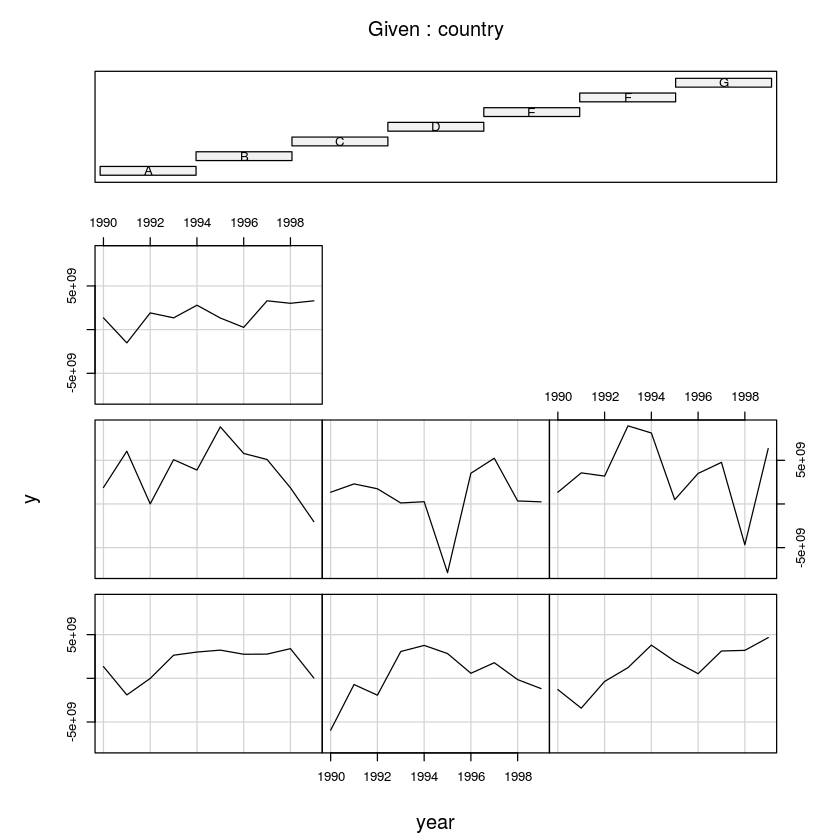

In [5]:
coplot(y ~ year|country, type="l", data=Panel)        # Lines

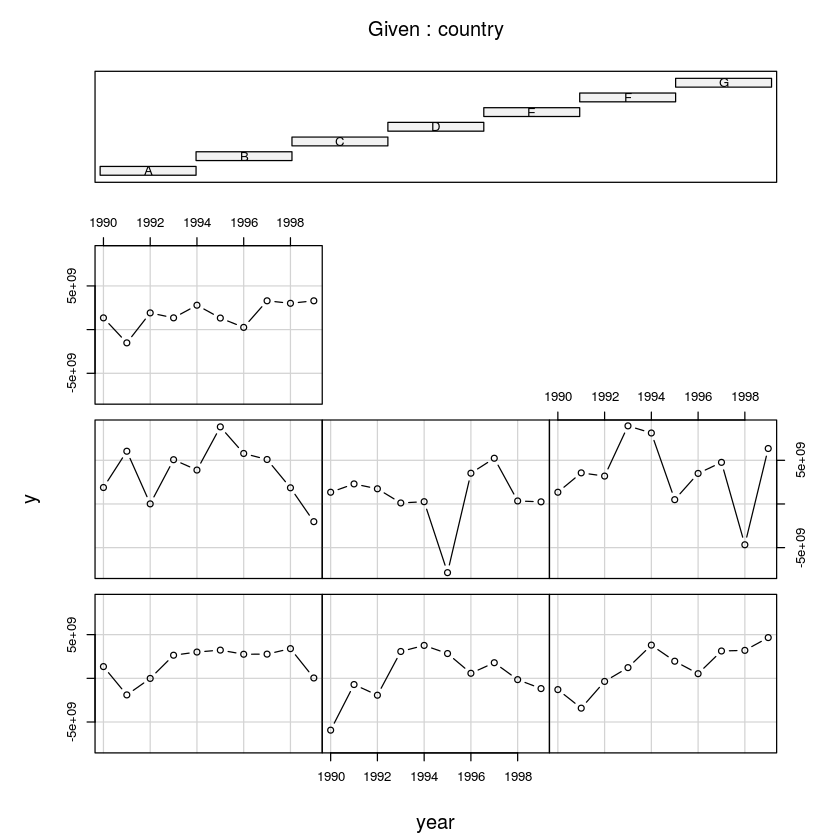

In [4]:
coplot(y ~ year|country, type="b", data=Panel)        # Points and lines

###

Bars at top indicates corresponding graph (i.e. countries)

from left to right starting on the bottom row 

(Muenchen/Hilbe:355)

### Exploring panel data


In [7]:
#install.packages("car")
library(foreign)
Panel <- read.dta("http://dss.princeton.edu/training/Panel101.dta")
library(car)
scatterplot(y~year|country, boxplots=FALSE, smooth=TRUE, reg.line=FALSE, data=Panel)

Loading required package: carData


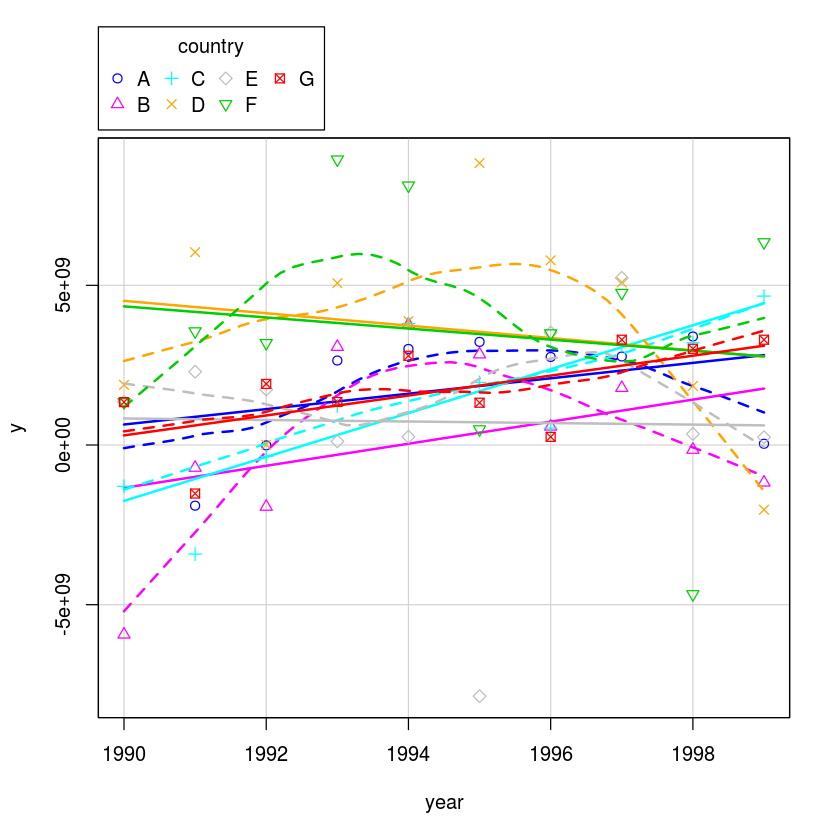

In [6]:
library(car)
scatterplot(y~year|country, boxplots=FALSE, smooth=TRUE, data=Panel)

Heterogeneity: unobserved variables that do not change over time 




FIXED-EFFECTS MODEL

(Covariance Model, Within Estimator, Individual Dummy Variable Model, Least Squares Dummy Variable Model)

Installing package into ‘/home/jon/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)
also installing the dependencies ‘bitops’, ‘gtools’, ‘gdata’, ‘caTools’


Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



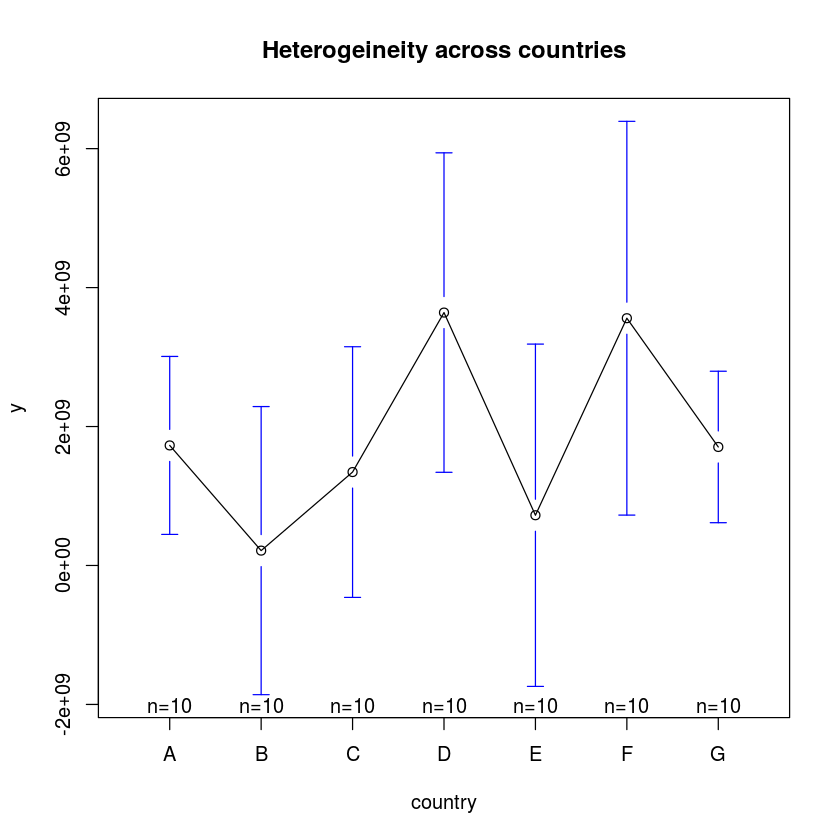

In [2]:
install.packages("gplots")
library(foreign)
Panel <- read.dta("http://dss.princeton.edu/training/Panel101.dta")
library(gplots)
plotmeans(y ~ country, main="Heterogeineity across countries", data=Panel)

In [3]:
# library(gplots)
# plotmeans(y ~ country, main="Heterogeineity across countries", data=Panel)
# plotmeans
# draw a 95% confidence interval around the means 
detach("package:gplots")
# Remove package ‘gplots’ from the workspace

In [4]:
ols<- lm(y ~ x1, data=Panel)
summary(ols)


Call:
lm(formula = y ~ x1, data = Panel)

Residuals:
       Min         1Q     Median         3Q        Max 
-9.546e+09 -1.578e+09  1.554e+08  1.422e+09  7.183e+09 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) 1.524e+09  6.211e+08   2.454   0.0167 *
x1          4.950e+08  7.789e+08   0.636   0.5272  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.028e+09 on 68 degrees of freedom
Multiple R-squared:  0.005905,	Adjusted R-squared:  -0.008714 
F-statistic: 0.4039 on 1 and 68 DF,  p-value: 0.5272


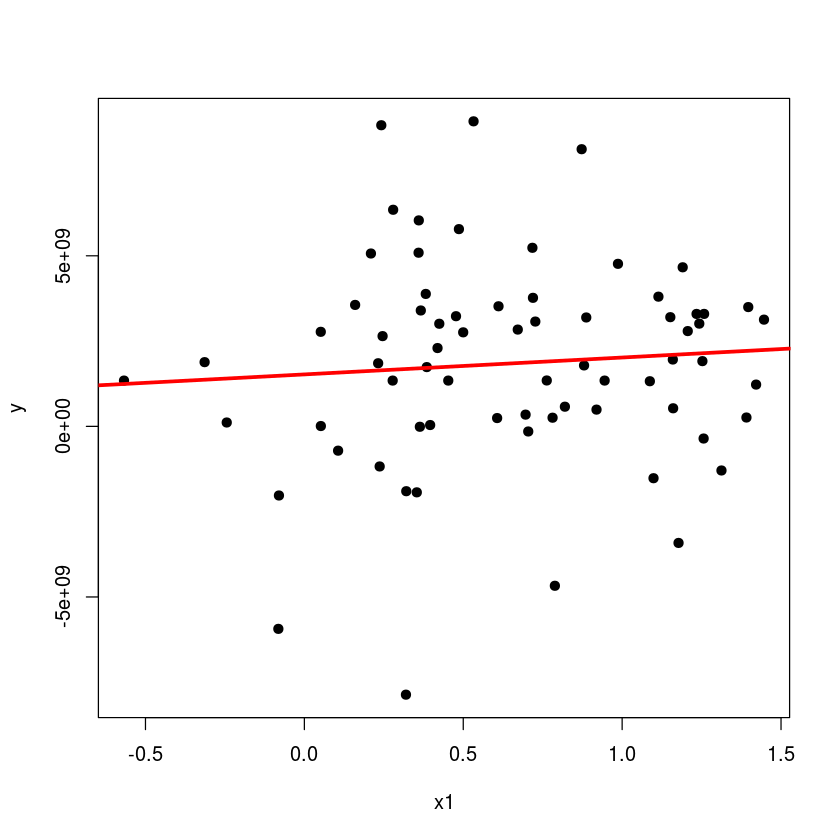

In [8]:
yhat <-ols$fitted
plot(Panel$x1, Panel$y, pch=19, xlab="x1", ylab="y")
abline(lm(Panel$y~Panel$x1),lwd=3, col="red")

In [9]:
fixed.dum <-lm(y ~ x1 + factor(country) -1, data=Panel)
summary(fixed.dum)


Call:
lm(formula = y ~ x1 + factor(country) - 1, data = Panel)

Residuals:
       Min         1Q     Median         3Q        Max 
-8.634e+09 -9.697e+08  5.405e+08  1.386e+09  5.612e+09 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
x1                2.476e+09  1.107e+09   2.237  0.02889 *  
factor(country)A  8.805e+08  9.618e+08   0.916  0.36347    
factor(country)B -1.058e+09  1.051e+09  -1.006  0.31811    
factor(country)C -1.723e+09  1.632e+09  -1.056  0.29508    
factor(country)D  3.163e+09  9.095e+08   3.478  0.00093 ***
factor(country)E -6.026e+08  1.064e+09  -0.566  0.57329    
factor(country)F  2.011e+09  1.123e+09   1.791  0.07821 .  
factor(country)G -9.847e+08  1.493e+09  -0.660  0.51190    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.796e+09 on 62 degrees of freedom
Multiple R-squared:  0.4402,	Adjusted R-squared:  0.368 
F-statistic: 6.095 on 8 and 62 DF,  p-value: 8.892e-06


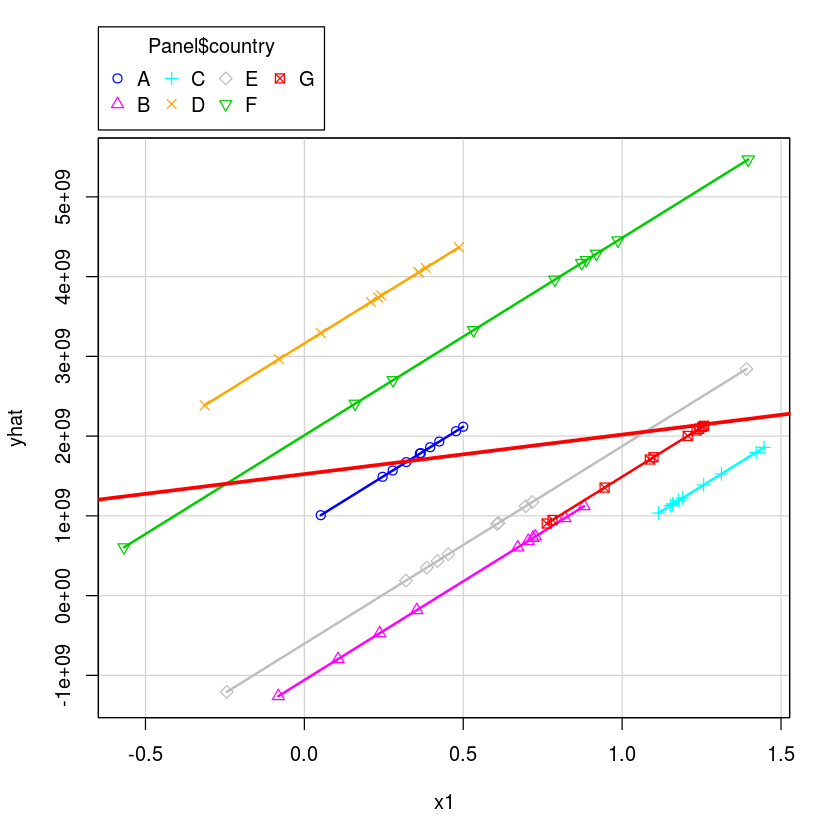

In [10]:
yhat<-  fixed.dum$fitted
# > library(car)
scatterplot(yhat~Panel$x1|Panel$country, boxplots=FALSE, xlab="x1", ylab="yhat",smooth=FALSE)
abline(lm(Panel$y~Panel$x1),lwd=3, col="red")

### Comparing OLS vs LSDV model
Each component of the factor variable (country) is absorbing the effects particular to each 
country. Predictor x1 was not significant in the OLS model, once controlling for differences across 
countries, x1 became significant in the OLS_DUM (i.e. LSDV model).

In [12]:
# install.packages("apsrtable")
library(apsrtable)
apsrtable(ols,fixed.dum, model.names = c("OLS", "OLS_DUM"))   # Displays a table in Latex form

Installing package into ‘/home/jon/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)


\begin{table}[!ht]
\caption{}
\label{} 
\begin{tabular}{ l D{.}{.}{2}D{.}{.}{2} } 
\hline 
  & \multicolumn{ 1 }{ c }{ OLS } & \multicolumn{ 1 }{ c }{ OLS_DUM } \\ \hline
 %                & OLS              & OLS_DUM         \\ 
(Intercept)      & 1524319070.05 ^* &                 \\ 
                 & (621072623.86)   &                 \\ 
x1               & 494988913.90     & 2475617827.10 ^*\\ 
                 & (778861260.95)   & (1106675593.60) \\ 
factor(country)A &                  & 880542403.99    \\ 
                 &                  & (961807052.24)  \\ 
factor(country)B &                  & -1057858363.16  \\ 
                 &                  & (1051067684.19) \\ 
factor(country)C &                  & -1722810754.55  \\ 
                 &                  & (1631513751.40) \\ 
factor(country)D &                  & 3162826897.32 ^*\\ 
                 &                  & (909459149.66)  \\ 
factor(country)E &                  & -602622000.33   \\ 
                

In [15]:
# install.packages("plm")
library(plm)
fixed <-plm(y ~ x1, data=Panel, index=c("country", "year"), model="within")
summary(fixed)

Oneway (individual) effect Within Model

Call:
plm(formula = y ~ x1, data = Panel, model = "within", index = c("country", 
    "year"))

Balanced Panel: n = 7, T = 10, N = 70

Residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-8.63e+09 -9.70e+08  5.40e+08  0.00e+00  1.39e+09  5.61e+09 

Coefficients:
     Estimate Std. Error t-value Pr(>|t|)  
x1 2475617827 1106675594   2.237  0.02889 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    5.2364e+20
Residual Sum of Squares: 4.8454e+20
R-Squared:      0.074684
Adj. R-Squared: -0.029788
F-statistic: 5.00411 on 1 and 62 DF, p-value: 0.028892

#### Display the fixed effects (constants for each country)

In [16]:
fixef(fixed)    

A           B           C           D           E           F 
  880542404 -1057858363 -1722810755  3162826897  -602622000  2010731793 
          G 
 -984717493

#### Testing for fixed effects, null: OLS better than fixed

In [18]:
pFtest(fixed, ols)    
# Testing for fixed effects, null: OLS better than fixed


	F test for individual effects

data:  y ~ x1
F = 2.9655, df1 = 6, df2 = 62, p-value = 0.01307
alternative hypothesis: significant effects


## RANDOM-EFFECTS MODEL

(Random Intercept, Partial Pooling Model)

In [19]:
random <-plm(y ~ x1, data=Panel, index=c("country", "year"), model="random")

In [20]:
summary(random)

Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = y ~ x1, data = Panel, model = "random", index = c("country", 
    "year"))

Balanced Panel: n = 7, T = 10, N = 70

Effects:
                    var   std.dev share
idiosyncratic 7.815e+18 2.796e+09 0.873
individual    1.133e+18 1.065e+09 0.127
theta: 0.3611

Residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-8.94e+09 -1.51e+09  2.82e+08  0.00e+00  1.56e+09  6.63e+09 

Coefficients:
              Estimate Std. Error t-value Pr(>|t|)
(Intercept) 1037014284  790626206  1.3116   0.1941
x1          1247001782  902145601  1.3823   0.1714

Total Sum of Squares:    5.6595e+20
Residual Sum of Squares: 5.5048e+20
R-Squared:      0.02733
Adj. R-Squared: 0.013026
F-statistic: 1.91065 on 1 and 68 DF, p-value: 0.17141

In [22]:
# Setting as panel data (an alternative way to run the above model
Panel.set<-  pdata.frame(Panel, index = c("country", "year"))
# Random effects using panel setting (same output as above)
random.set<-  plm(y ~ x1, data = Panel.set, model="random")
summary(random.set)

Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = y ~ x1, data = Panel.set, model = "random")

Balanced Panel: n = 7, T = 10, N = 70

Effects:
                    var   std.dev share
idiosyncratic 7.815e+18 2.796e+09 0.873
individual    1.133e+18 1.065e+09 0.127
theta: 0.3611

Residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-8.94e+09 -1.51e+09  2.82e+08  0.00e+00  1.56e+09  6.63e+09 

Coefficients:
              Estimate Std. Error t-value Pr(>|t|)
(Intercept) 1037014284  790626206  1.3116   0.1941
x1          1247001782  902145601  1.3823   0.1714

Total Sum of Squares:    5.6595e+20
Residual Sum of Squares: 5.5048e+20
R-Squared:      0.02733
Adj. R-Squared: 0.013026
F-statistic: 1.91065 on 1 and 68 DF, p-value: 0.17141

#### Fixed or Random: Hausman test

If the p-value is significant (for example <0.05) then use fixed effects, if not use random effects

In [23]:
phtest(fixed, random)


	Hausman Test

data:  y ~ x1
chisq = 3.674, df = 1, p-value = 0.05527
alternative hypothesis: one model is inconsistent


#### OTHER TESTS/ DIAGNOSTICS

In [24]:
fixed.time <- plm(y ~ x1 + factor(year), data=Panel, index=c("country", "year"), model="within")
summary(fixed.time)

Oneway (individual) effect Within Model

Call:
plm(formula = y ~ x1 + factor(year), data = Panel, model = "within", 
    index = c("country", "year"))

Balanced Panel: n = 7, T = 10, N = 70

Residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-7.92e+09 -1.05e+09 -1.40e+08  0.00e+00  1.63e+09  5.49e+09 

Coefficients:
                   Estimate Std. Error t-value Pr(>|t|)  
x1               1389050354 1319849567  1.0524  0.29738  
factor(year)1991  296381558 1503368528  0.1971  0.84447  
factor(year)1992  145369666 1547226548  0.0940  0.92550  
factor(year)1993 2874386795 1503862554  1.9113  0.06138 .
factor(year)1994 2848156288 1661498927  1.7142  0.09233 .
factor(year)1995  973941306 1567245748  0.6214  0.53698  
factor(year)1996 1672812557 1631539254  1.0253  0.30988  
factor(year)1997 2991770063 1627062032  1.8388  0.07156 .
factor(year)1998  367463593 1587924445  0.2314  0.81789  
factor(year)1999 1258751933 1512397632  0.8323  0.40898  
---
Signif. codes:  0 ‘

In [25]:
fixef(fixed.time)

A           B           C           D           E           F 
  -90350477 -1842557091 -1719379833  2029595478 -1363667466  1347485302 
          G 
-1146682473

In [26]:
# Testing time-fixed effects. The null is that no time-fixed effects needed
pFtest(fixed.time, fixed)


	F test for individual effects

data:  y ~ x1 + factor(year)
F = 1.209, df1 = 9, df2 = 53, p-value = 0.3094
alternative hypothesis: significant effects


In [27]:
plmtest(fixed, c("time"), type=("bp"))


	Lagrange Multiplier Test - time effects (Breusch-Pagan) for balanced
	panels

data:  y ~ x1
chisq = 0.16532, df = 1, p-value = 0.6843
alternative hypothesis: significant effects


If this number is < 0.05 then  use time-fixed effects. In this example, no need to use time-fixed effects.